<a href="https://colab.research.google.com/github/Shisiajoy/MACHINE-LEARNING-1/blob/main/Credit_risk_modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**LIBRARIES AND DATA IMPORT**

## Introduction and Library Importing

In [30]:
# General Libraries

import warnings
warnings.filterwarnings('ignore')

# Data Explotation libraries
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt #Visualization
import seaborn as sns #Advanced Visualization
%matplotlib inline

# Data modelling libraries
from sklearn.impute import SimpleImputer
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler

import joblib


from sklearn.metrics import classification_report, confusion_matrix
import itertools
from sklearn.metrics import f1_score

In [2]:
#Loading data
Loan = pd.read_csv("/content/raw-data.csv")

In [3]:
Loan.head(2)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32
0,1,0,0,24,0,2432,46500,24,1385,SC,...,NaN,NaN,46500.0,NaN,NaN,0,0,0,TIER 1,0.0
1,2,0,1,24,1,1495,28168,24,2496,MO,...,NaN,NaN,28168.0,NaN,NaN,0,0,0,TIER 1,0.0


In [4]:
#Renaming columns in the dataset with their correct names
Loan_data = Loan.rename(columns={'V1': 'Customer ID',
'V2': 'Customer has bounced in first EMI',
'V3': 'No of times bounced 12 months',
'V4': 'Maximum MOB',
'V5': 'No of times bounced while repaying the loan',
'V6': 'EMI',
'V7': 'Loan Amount',
'V8': 'Tenure',
'V9': 'Dealer codes from where customer has purchased the Two wheeler',
'V10': 'Product code of Two wheeler',
'V11': 'No of advance EMI paid',
'V12': 'Rate of interest',
'V13': 'Gender',
'V14': 'Employment type',
'V15': 'Resident type of customer',
'V16': 'Date of birth',
'V17': 'Customer age when loanwas taken',
'V18': 'No of loans',
'V19': 'No of secured loans',
'V20': 'No of unsecured loans',
'V21': 'Max amount sanctioned in the Live loans',
'V22': 'No of new loans in last 3 months',
'V23': 'Total sanctioned amount in the secured Loans which are Live',
'V24': 'Total sanctioned amount in the unsecured Loans which are Live',
'V25': 'Maximum amount sanctioned for any Two wheeler loan',
'V26': 'Time since last Personal loan taken (in months)',
'V27': 'Time since first consumer durables loan taken (in months)',
'V28': 'No of times 30 days past due in last 6 months',
'V29': 'No of times 60 days past due in last 6 months',
'V30': 'No of times 90 days past due in last 3 months',
'V31': 'Tier',
'V32': 'Target variable'})
Loan_data.head(2)


,Customer ID,Customer has bounced in first EMI,No of times bounced 12 months,Maximum MOB,No of times bounced while repaying the loan,EMI,Loan Amount,Tenure,Dealer codes from where customer has purchased the Two wheeler,Product code of Two wheeler,...,Total sanctioned amount in the secured Loans which are Live,Total sanctioned amount in the unsecured Loans which are Live,Maximum amount sanctioned for any Two wheeler loan,Time since last Personal loan taken (in months),Time since first consumer durables loan taken (in months),No of times 30 days past due in last 6 months,No of times 60 days past due in last 6 months,No of times 90 days past due in last 3 months,Tier,Target variable
0,1,0,0,24,0,2432,46500,24,1385,SC,...,NaN,NaN,46500.0,NaN,NaN,0,0,0,TIER 1,0.0
1,2,0,1,24,1,1495,28168,24,2496,MO,...,NaN,NaN,28168.0,NaN,NaN,0,0,0,TIER 1,0.0


In [5]:
CatVariables =Loan_data.select_dtypes(include=['object'])
NumVariables = Loan_data.select_dtypes(include=['float','int'])

#standardizing column names for easier usage
Loan_data.columns=Loan_data.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
CatVariables=CatVariables.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
NumVariables=NumVariables.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

## EDA and Data Cleaning

In [6]:
Loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37325 entries, 0 to 37324
Data columns (total 32 columns):
 #   Column                                                          Non-Null Count  Dtype  
---  ------                                                          --------------  -----  
 0   customer_id                                                     37325 non-null  int64  
 1   customer_has_bounced_in_first_emi                               37325 non-null  int64  
 2   no_of_times_bounced_12_months                                   37325 non-null  int64  
 3   maximum_mob                                                     37325 non-null  int64  
 4   no_of_times_bounced_while_repaying_the_loan                     37325 non-null  int64  
 5   emi                                                             37325 non-null  int64  
 6   loan_amount                                                     37325 non-null  int64  
 7   tenure                                           

### Exploring and Dealing with Missingness

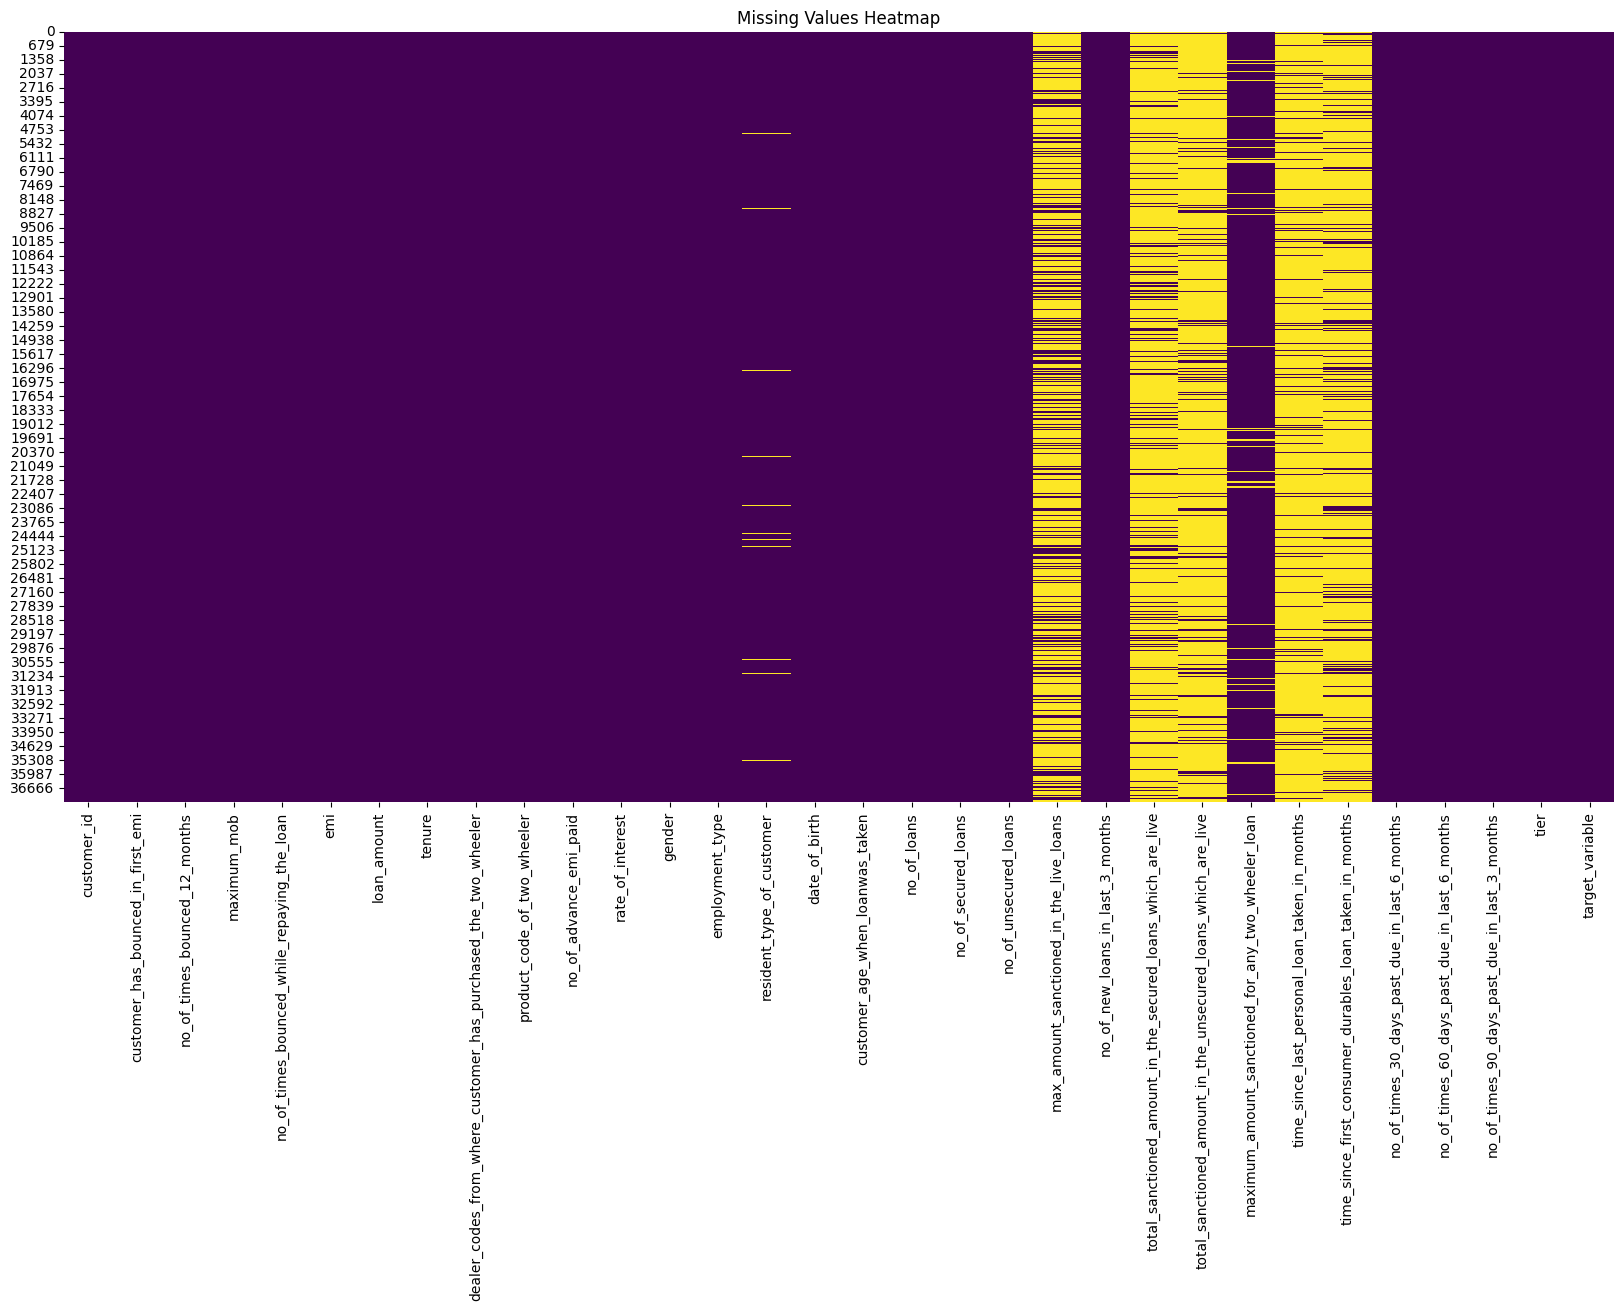

In [7]:
# Calculate the percentage of missing values in each column
missing_percentage = Loan_data.isnull().mean() * 100

# print(missing_percentage)

# Create a DataFrame with missing value indicators (True for missing, False for not missing)
missing_values = Loan_data.isnull()

# Create a heatmap of missing values
plt.figure(figsize=(20, 10))
sns.heatmap(missing_values, cmap='viridis', cbar=False)
plt.title('Missing Values Heatmap')
plt.show()


In [8]:
# Drop columns with more than 50% missing values
threshold = 50  # Adjust this threshold based on your judgment
Loan_data = Loan_data.dropna(thresh=len(Loan_data) - threshold*len(Loan_data)/100, axis=1)
# Missing values treatment - Dropping Rows with missing values - based on the loan amount, why, we do expect that if someone has not applied for a loan, which is implied by loan amount being zero, they should be classified as a defaulter or otherwise.,
Loan_data.dropna(axis=0,how='any',subset=['loan_amount'],inplace=True)

In [9]:
### Imputation
# Impute missing values in numerical columns with mean
numerical_cols = Loan_data.select_dtypes(include=['float64']).columns
Loan_data[numerical_cols] = Loan_data[numerical_cols].fillna(Loan_data[numerical_cols].median())

# Impute missing values in categorical columns with mode
categorical_cols = Loan_data.select_dtypes(include=['object']).columns
Loan_data[categorical_cols] = Loan_data[categorical_cols].fillna(Loan_data[categorical_cols].mode().iloc[0])

### Check for imbalance

In [10]:
# Calculate value counts for the target variable
target_counts = Loan_data['target_variable'].value_counts()

print(target_counts)


target_variable
0.0    36441
1.0      884
Name: count, dtype: int64


### Exploring Linear Separability of the classes.

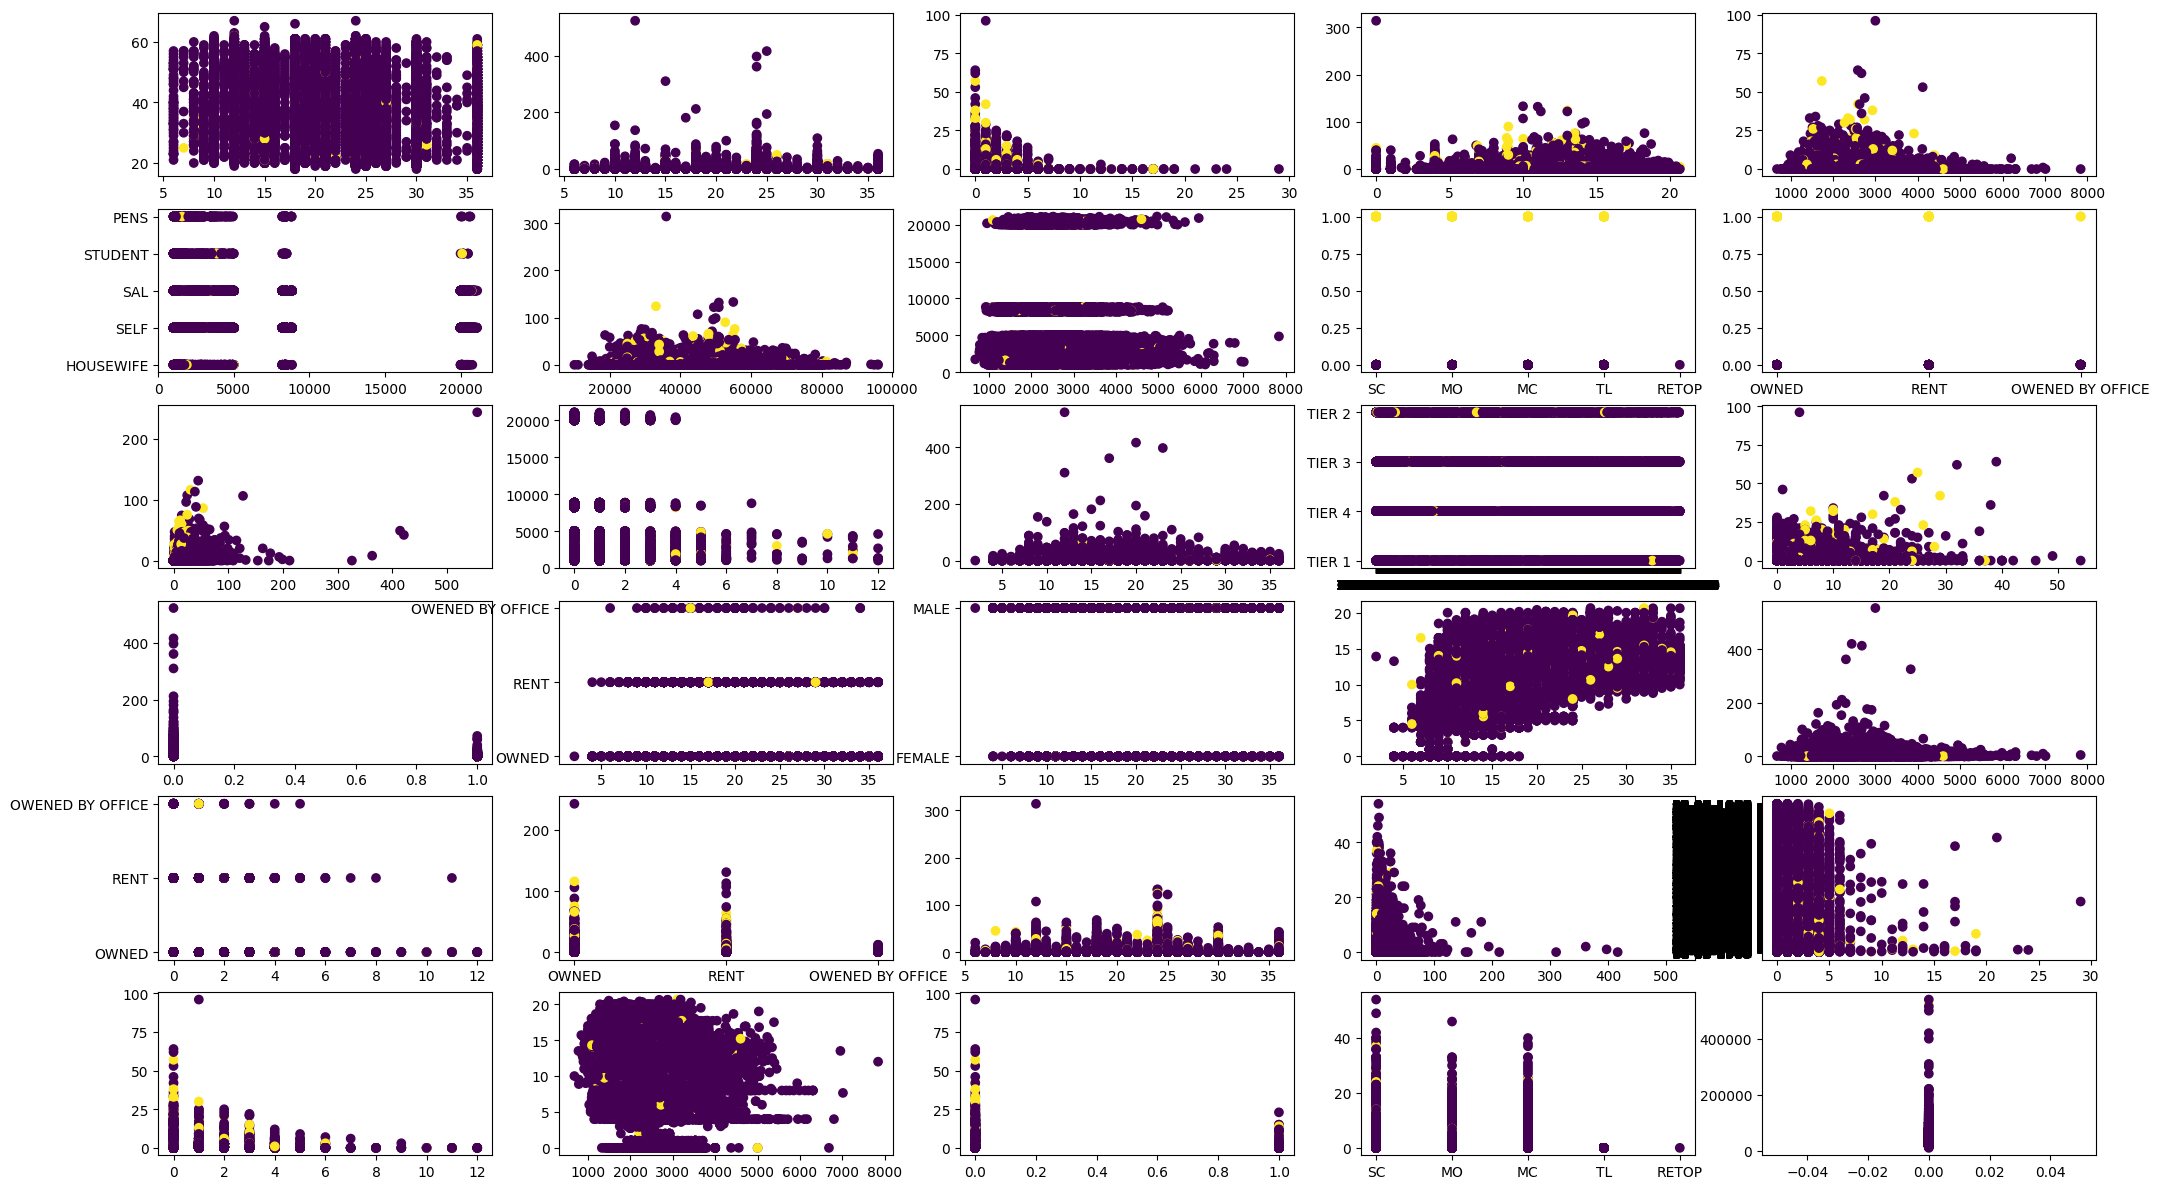

In [11]:
## Check for linear separability

#Bivariate Data Analysis (Scatter Plots)
comb = list(itertools.combinations([a for a in range(1, len(Loan_data.columns))], 2)) #Create combinations of all features, in twos (bivariate)
rand = random.choices(comb, k=30) #Randomly choose 30 bivariate relationships to visualise. Total bivariate relationships (4060 = 30C3) is too much

fig = plt.figure(figsize=(25,25))
for i in range(len(rand)):
    ax = fig.add_subplot(10,5, i+1)
    plt.scatter(Loan_data[Loan_data.columns[rand[i][0]]],Loan_data[Loan_data.columns[rand[i][1]]],c=Loan_data.target_variable)


Deductions

- Most of the features are not linearly sepaerable from the bivarient scatter plots.

- Multi class classification algorithms would be the best approach for modeling the data.ie SVM , kNN , Random forest.

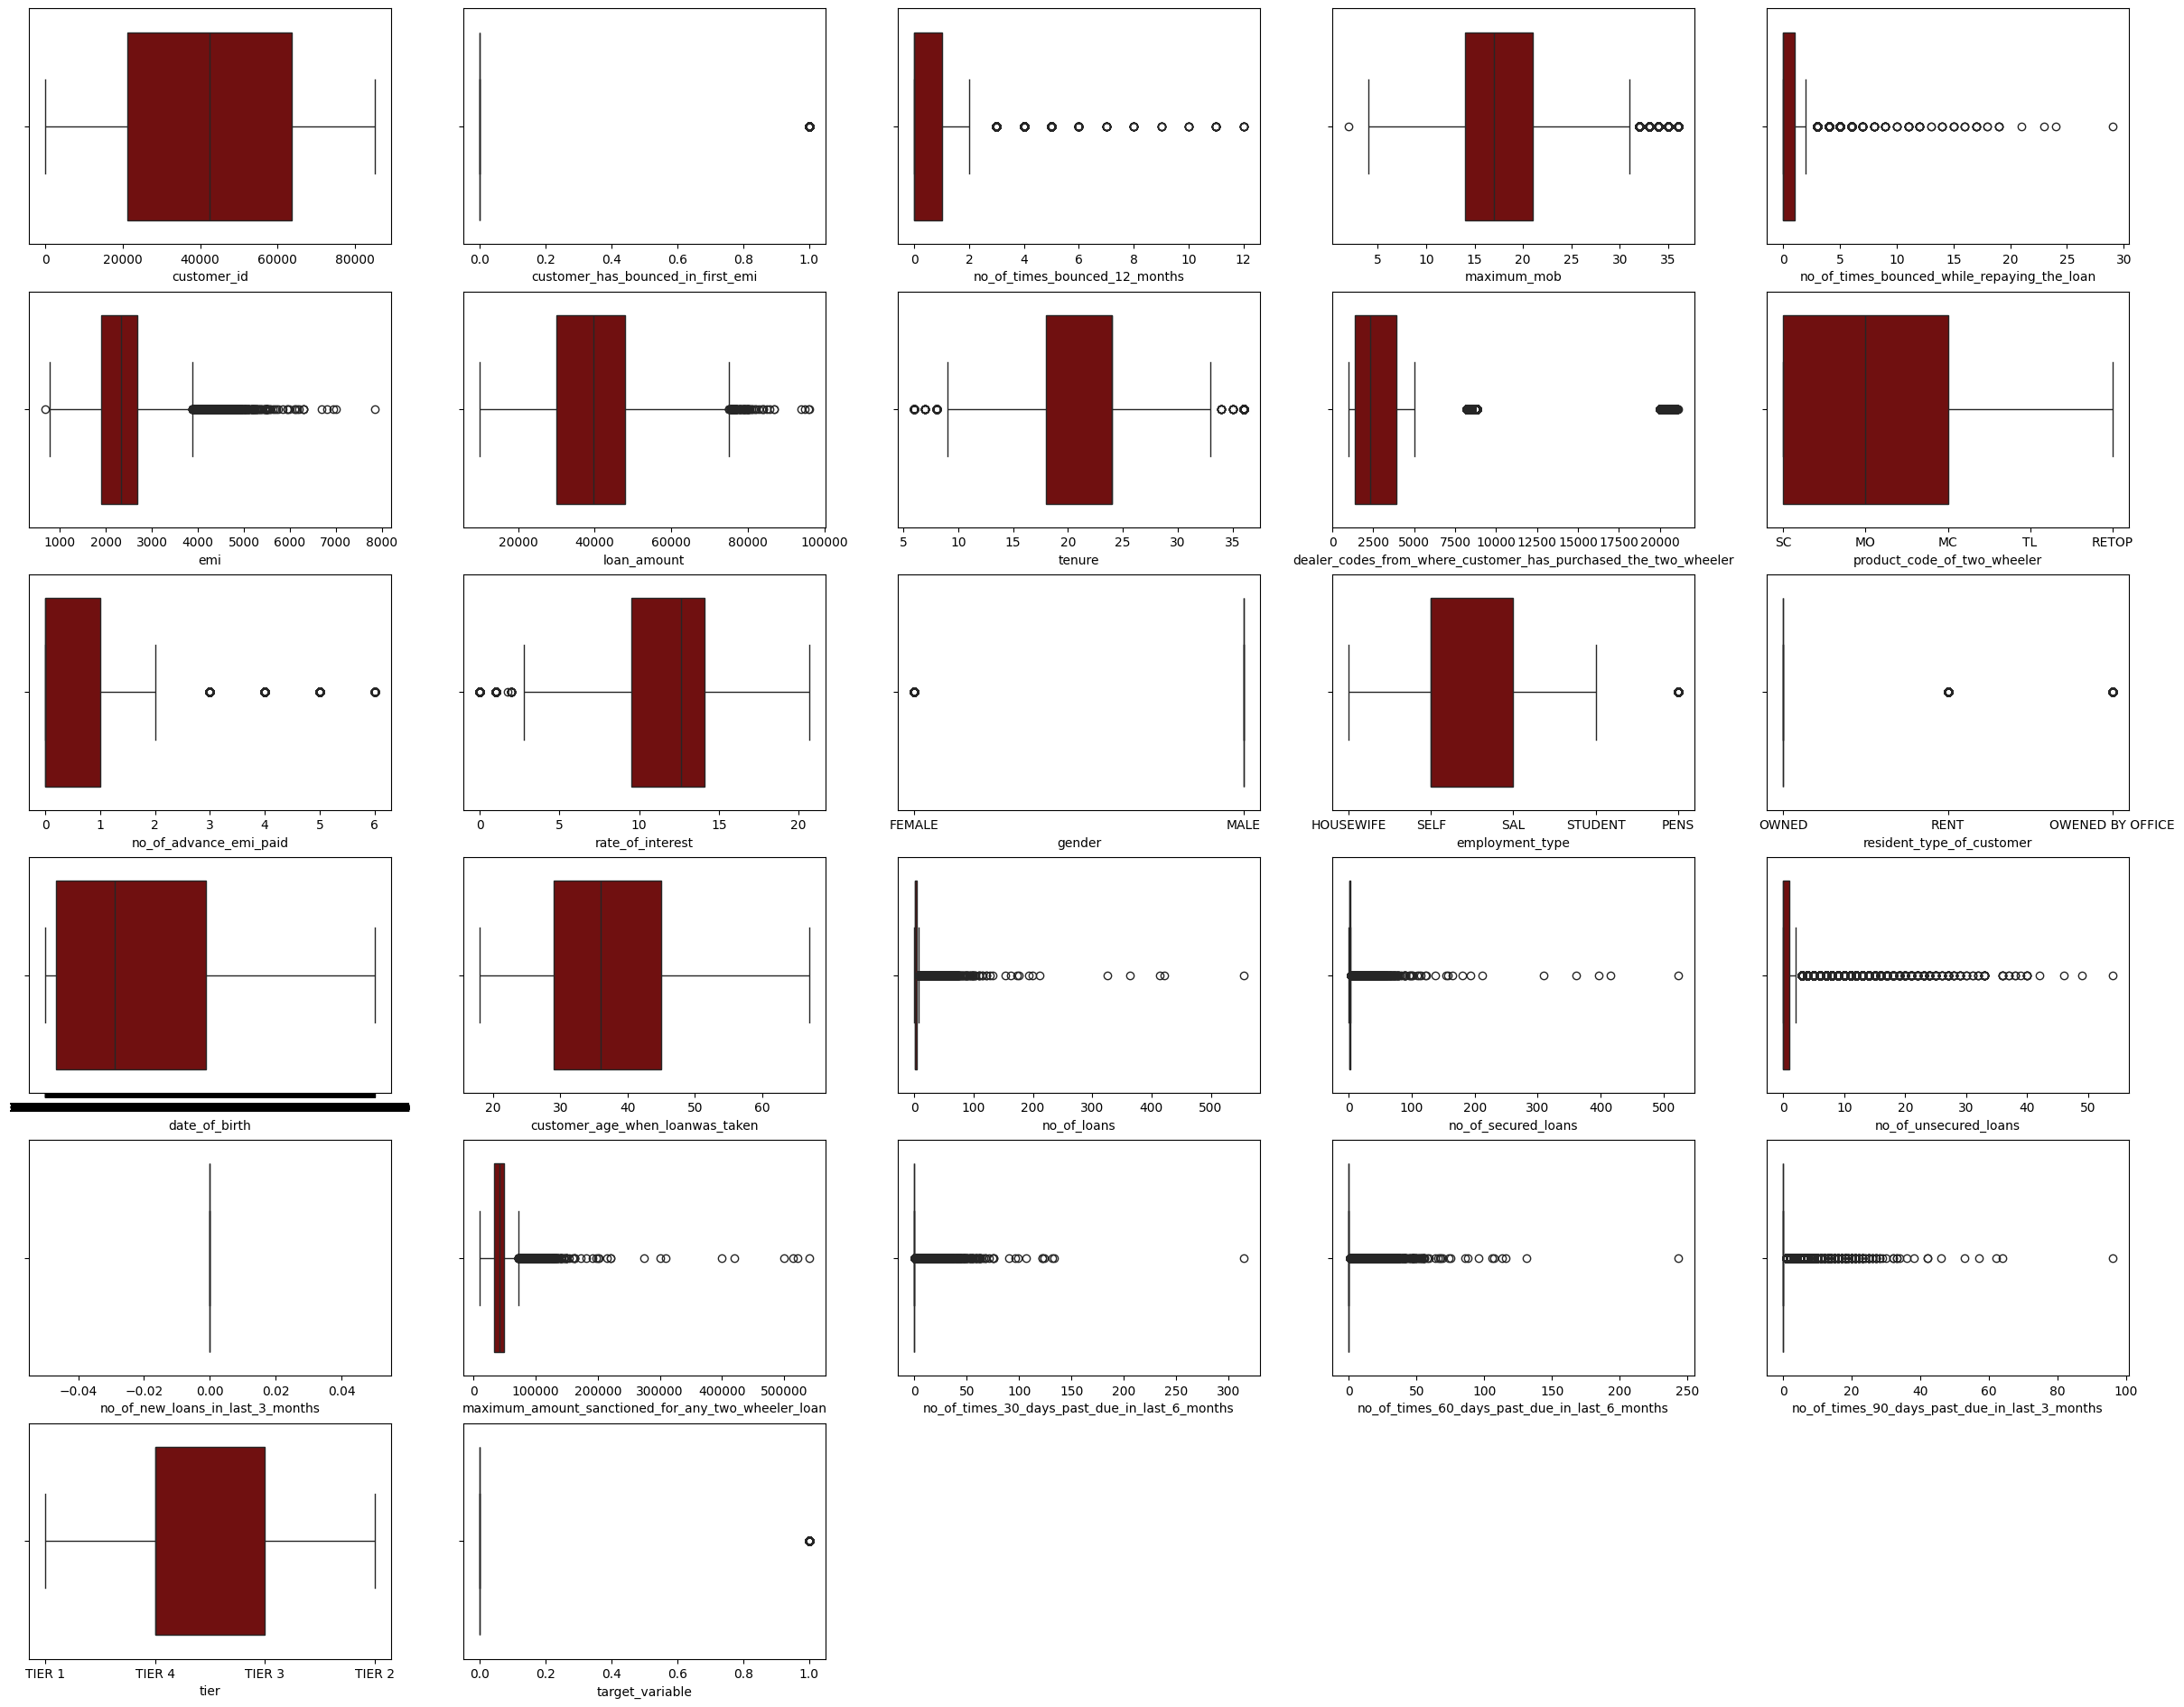

In [13]:
## Check for outliers
# Unitvariate analysis of all the numerical variables - we are trying to see if there are outliers.
fig = plt.figure(figsize=(30,40))
for i,j in zip(Loan_data.columns,range(len(Loan_data.columns))):
    if i!='target variable':
        ax = fig.add_subplot(10,5, j+1)
        sns.boxplot(data=Loan_data,x=Loan_data[i],orient='v',color="Maroon")

### Encoding

In [11]:
# Dealing with categorical columns
# Label Encoding for object to numeric conversion

le = LabelEncoder()

for feature in categorical_cols:
    Loan_data[feature] = le.fit_transform(Loan_data[feature].astype(str))

## DATA SEPARATION

In [12]:
X=Loan_data.drop(['customer_id','target_variable'],axis=1)
y=Loan_data[["target_variable"]]

In [13]:
#Train Test Split: Reserve 30% of data for final model testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=20)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(29860, 25) (7465, 25) (29860, 1) (7465, 1)


## MODELLING

In [18]:
## Models

#Logistic Regression (No Regularisation)
pipe = make_pipeline(PolynomialFeatures(degree=3),MinMaxScaler(), LogisticRegression(penalty='none', solver='lbfgs'))
scores = cross_val_score(pipe, X_train, y_train, cv=5, scoring="accuracy")
print(scores, scores.mean())

[0.97677837 0.97648442 0.97721928 0.97692364 0.97670317] 0.9768217758202488


In [16]:
# Logistic Regression with Ridge Regularization (L2)
pipe = make_pipeline(
    PolynomialFeatures(degree=3),
    LogisticRegression(penalty='l2', solver='saga', C=100)
)

# Perform cross-validation
scores = cross_val_score(pipe, X_train, y_train, cv=5, scoring="accuracy")

# Print the scores and the mean accuracy
print(scores, scores.mean())

[0.97705961 0.97689216 0.97689216 0.97689216 0.97689216] 0.9769256530475554


In [15]:
# classification - Random Forest
pipe = make_pipeline(PolynomialFeatures(degree=2),RandomForestClassifier(n_estimators=500))
z = cross_val_score(pipe, X_train, y_train, cv=5, scoring="accuracy")
print(scores, scores.mean())

[0.97756196 0.97689216 0.97622237 0.97689216 0.97605492] 0.9767247153382451


## HYPER PARAMETER TUNNING

In [17]:
model = RandomForestClassifier()
# make a dictionary of hyper parameter values to be searched
search_space ={
    "n_estimators" : [100,200,500],
    'max_depth' : [2,5,10,40],
    'max_features':[5,10,15],
    'criterion':['gini','entropy']
}

In [20]:
# We make a Grid Search CV Object
GS = GridSearchCV(estimator=model,
                param_grid=search_space,
                scoring='f1')

In [21]:
GS.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 5, 10, 40],
                         'max_features': [5, 10, 15],
                         'n_estimators': [100, 200, 500]},
             scoring='f1')

In [22]:
#model trained and saved
print(GS.best_estimator_)


RandomForestClassifier(max_depth=40, max_features=15)


In [23]:
# Make predictions on the test set
y_pred = GS.best_estimator_.predict(X_test)


## EVALUATION OF PERFORMANCE ON TEST SET

In [24]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

         0.0       0.97      1.00      0.99      7270
         1.0       0.30      0.02      0.03       195

    accuracy                           0.97      7465
   macro avg       0.64      0.51      0.51      7465
weighted avg       0.96      0.97      0.96      7465

[[7263    7]
 [ 192    3]]


## ANALYSIS (1)

- Imbalance:

The dataset is highly imbalanced with 7270 samples of class 0.0 and only 195 samples of class 1.0.
This imbalance skews the accuracy metric, making it high (0.97) but misleading because the model performs poorly on the minority class.

- Performance on Class 0.0:

The model performs exceptionally well on the majority class (0.0) with high precision, recall, and F1-score.

- Performance on Class 1.0:

The model struggles significantly with the minority class (1.0), showing low precision (30%) and very low recall (2%), leading to a poor F1-score (3%).
The confusion matrix shows that out of 195 true positives, the model correctly identifies only 3 and misclassifies 192 as class 0.0.

In [26]:
# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# Split the balanced data
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42)

# Define and train the model with class weights
model = RandomForestClassifier(random_state=42, class_weight='balanced')
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the performance
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

         0.0       0.99      0.96      0.97     10980
         1.0       0.96      0.99      0.97     10885

    accuracy                           0.97     21865
   macro avg       0.97      0.97      0.97     21865
weighted avg       0.97      0.97      0.97     21865

[[10527   453]
 [  140 10745]]


## ANALYSIS (2)

-The new classification report and confusion matrix show a significant improvement in the model's performance on both classes.

- Overall Performance:

The model shows excellent performance with a high overall accuracy of 97%.
Both precision and recall for each class are very high, indicating the model is accurately identifying both classes.

- Class 0.0 Performance:

Precision: 99% of the predictions for class 0.0 are correct.
Recall: The model correctly identifies 96% of the actual 0.0 class samples.
F1-Score: A harmonic mean of precision and recall is 97%, indicating a balanced performance.

- Class 1.0 Performance:

Precision: 96% of the predictions for class 1.0 are correct.
Recall: The model correctly identifies 99% of the actual 1.0 class samples.
F1-Score: A harmonic mean of precision and recall is 97%, indicating a balanced performance.

## CREDIT SCORE GENERATION AND RANKING

In [32]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42)

# Get probability scores for the positive class (class 1)
probabilities = model.predict_proba(X_test)[:, 1]

# Define credit score range
min_score = 0
max_score = 850

# Scale the probabilities to the credit score range
credit_scores = min_score + (max_score - min_score) * probabilities

# Define the categories based on the given ranges
def categorize_credit_score(score):
    if score <= 200:
        return 'Bad Customer'
    elif 201 <= score <= 350:
        return '2nd Worst'
    elif 351 <= score <= 500:
        return 'Not So Bad'
    elif 501 <= score <= 700:
        return 'Ideal Guys'
    else:
        return 'Big Loans'

# Apply the categorization
categories = np.array([categorize_credit_score(score) for score in credit_scores])

# Combine credit scores and categories into a DataFrame for better visualization
results = pd.DataFrame({
    'Credit Score': credit_scores,
    'Category': categories
})


print(results.head(10))


   Credit Score      Category
0         195.5  Bad Customer
1         161.5  Bad Customer
2         263.5     2nd Worst
3           0.0  Bad Customer
4         204.0     2nd Worst
5           0.0  Bad Customer
6           8.5  Bad Customer
7           0.0  Bad Customer
8           0.0  Bad Customer
9           8.5  Bad Customer
